# Hypothesis 3: there is a direct relationship between the price and review scores.

We want to check if there exist a direct relation between the price and scores or not. In the other words, our hypothesis is that the guests are more satisfied with expensive places.


In [179]:
import pandas as pd
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
listings = pd.read_csv('../Dataset/Florence/listings.csv')
listings_summary2 = listings[['id','price',
                              'number_of_reviews','review_scores_rating','review_scores_accuracy',
                              'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                              'review_scores_location','review_scores_value']]
listings_summary2

,id,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,24469,$70.00,1,5.00,5.00,5.00,5.00,5.00,4.00,5.00
1,24470,$70.00,3,4.67,5.00,5.00,5.00,5.00,4.00,5.00
2,24471,$135.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24472,$120.00,2,3.00,5.00,5.00,5.00,5.00,4.00,4.50
4,26738,$149.00,31,4.52,4.32,4.92,4.64,4.72,5.00,4.32
...,...,...,...,...,...,...,...,...,...,...
10192,28666546,$100.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00
10193,11762656,$143.00,63,4.90,4.94,4.90,4.97,4.98,4.90,4.92
10194,40297561,$80.00,9,4.44,4.67,4.89,4.89,4.78,4.56,4.44
10195,22415145,$155.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



we import the listing file. There are lots of other information in the imported table which have nothing to do with our hypothesis. So, we can choose the related columns to check our hypothesis.
we should consider that our data is not always in the desired form. Here, there is extra characters in price column such as '$' and ',' that should be removed. Also, there are some NaN values that are replaced by 0. At the end all values should be converted from string to float type.
The other point is that data records with price 0 are false information that may affect our investigation wrongly.
Furthermore, The records with 'number_of_reviews'= 0 can not help us as their scores have NaN value.

In [181]:
listings_summary2['price'] = listings_summary2['price'].str.replace('$', '')
listings_summary2['price'] = listings_summary2['price'].str.replace(',', '')
listings_summary2['review_scores_value'] = listings_summary2['review_scores_value'].fillna(0)
listings_summary2['price'] = pd.to_numeric(listings_summary2['price'])
listings_summary2 = listings_summary2.loc[listings_summary2['price'] > 0]
listings_summary2 = listings_summary2.loc[listings_summary2['review_scores_value'] > 0]


/tmp/ipykernel_7492/3388207967.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings_summary2['price'] = listings_summary2['price'].str.replace('$', '')
/tmp/ipykernel_7492/3388207967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_summary2['price'] = listings_summary2['price'].str.replace('$', '')
/tmp/ipykernel_7492/3388207967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [182]:
listings_summary2.iloc[1,listings_summary2['review_scores_value']].shape

(8341,)

In [183]:
print('initial data shape:',listings.shape)
print('selected data shape:',listings_summary2.shape)


initial data shape: (10197, 74)
selected data shape: (8341, 10)


In [184]:
listings_summary2['price'].max()

9243.0

Below graphs, show the redundancy of prices and also the value scores in terms of price.

[Text(0.5, 0, 'price'), Text(0, 0.5, 'review scores value')]

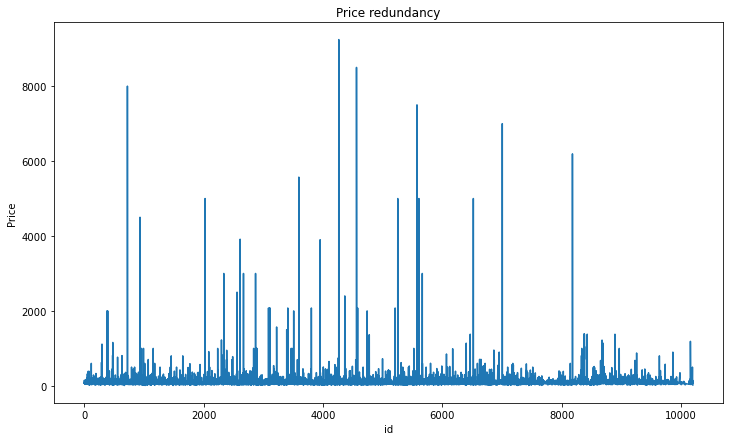

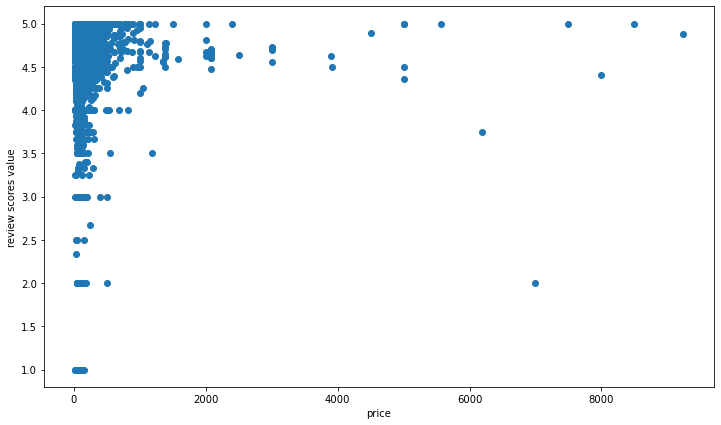

In [195]:
price_rate = pd.DataFrame(listings_summary2[["price",'review_scores_value']])
fig = price_rate['price'].plot(figsize=(12,7),title='Price redundancy')
fig.set_xlabel('id')
fig.set_ylabel('Price')

plt.figure(figsize=(12,7))
plt.scatter(price_rate["price"],price_rate['review_scores_value'])
plt.gca().update(dict(xlabel='price', ylabel='review scores value'))



Now, we can check the correlation between the columns.

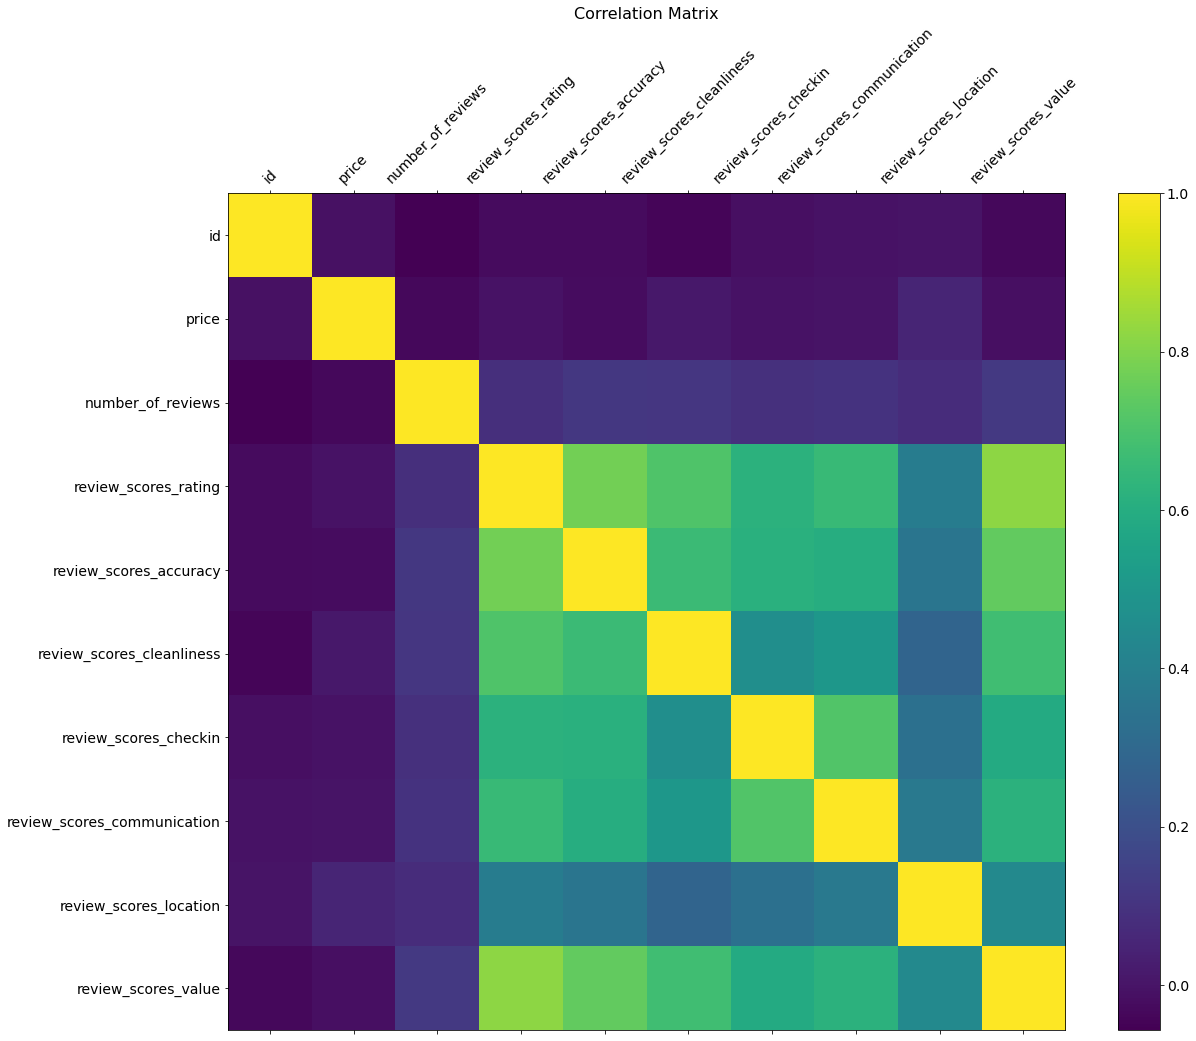

In [196]:
f = plt.figure(figsize=(19, 15))
plt.matshow(listings_summary2.corr(), fignum=f.number)
plt.xticks(range(listings_summary2.select_dtypes(['number']).shape[1]), listings_summary2.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(listings_summary2.select_dtypes(['number']).shape[1]), listings_summary2.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

It seems that our Hypothesis can not be True.
From previous plot, we saw that most of the records have the price less than 1000. We can assume that the data records with higher price are outliers and ignore them, then check the correlations again.

In [203]:
listings_summary3 = listings_summary2.loc[listings_summary2['price'] < 1000]
listings_summary3

,id,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,24469,70.0,1,5.00,5.00,5.00,5.00,5.00,4.00,5.00
1,24470,70.0,3,4.67,5.00,5.00,5.00,5.00,4.00,5.00
3,24472,120.0,2,3.00,5.00,5.00,5.00,5.00,4.00,4.50
4,26738,149.0,31,4.52,4.32,4.92,4.64,4.72,5.00,4.32
5,31840,67.0,121,4.65,4.74,4.87,4.85,4.91,4.90,4.71
...,...,...,...,...,...,...,...,...,...,...
10190,1226029,54.0,23,4.32,4.14,4.00,4.43,4.71,4.43,4.38
10192,28666546,100.0,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00
10193,11762656,143.0,63,4.90,4.94,4.90,4.97,4.98,4.90,4.92
10194,40297561,80.0,9,4.44,4.67,4.89,4.89,4.78,4.56,4.44


[Text(0.5, 0, 'price'), Text(0, 0.5, 'review scores value')]

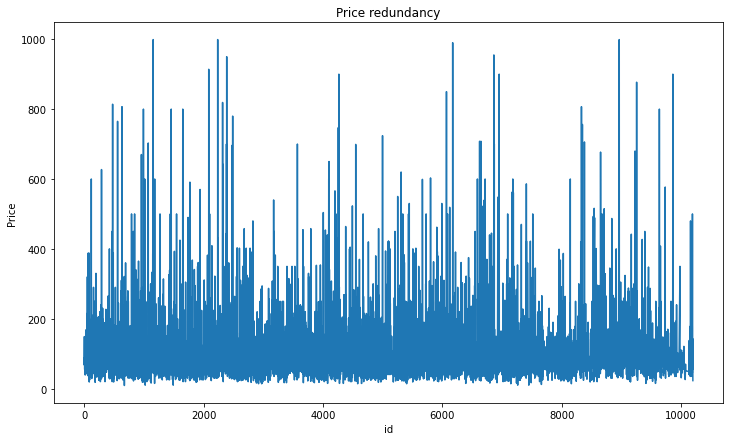

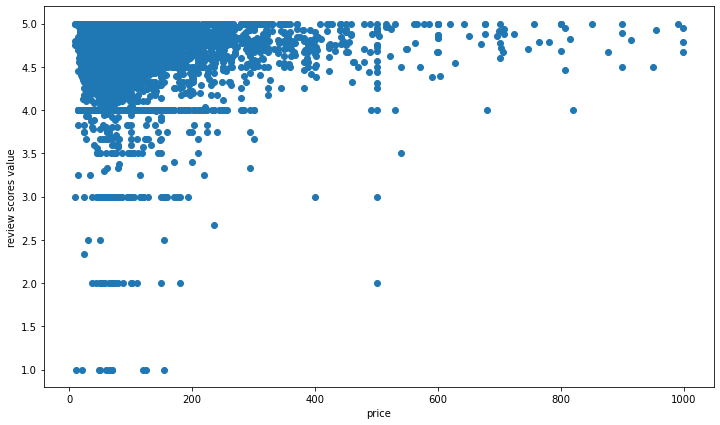

In [205]:
price_rate2 = pd.DataFrame(listings_summary3[["price",'review_scores_value']])
fig = price_rate2['price'].plot(figsize=(12,7),title='Price redundancy')
fig.set_xlabel('id')
fig.set_ylabel('Price')

plt.figure(figsize=(12,7))
plt.scatter(price_rate2["price"],price_rate2['review_scores_value'])
plt.gca().update(dict(xlabel='price', ylabel='review scores value'))


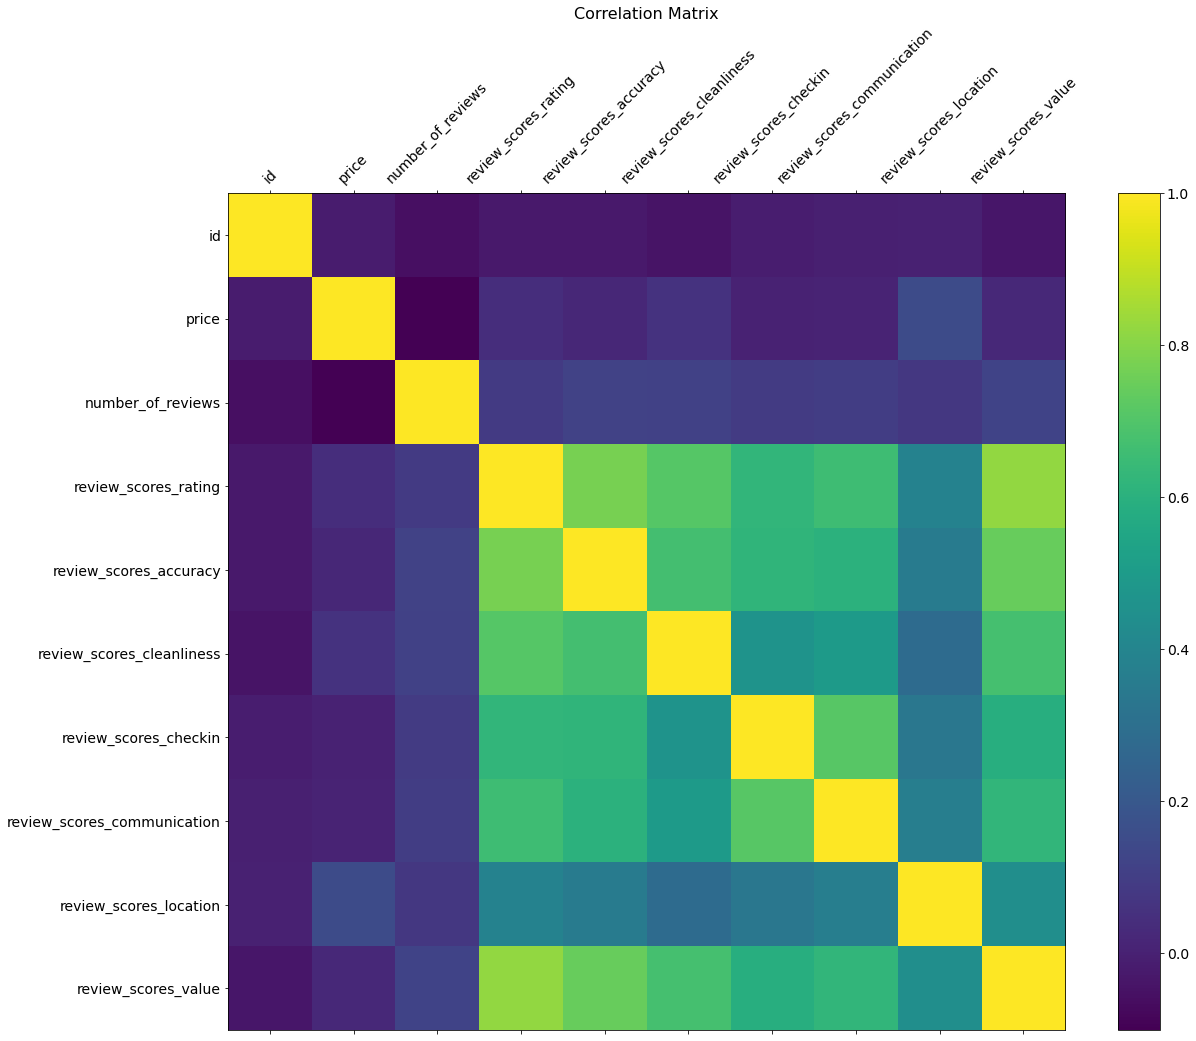

In [206]:
f = plt.figure(figsize=(19, 15))
plt.matshow(listings_summary3.corr(), fignum=f.number)
plt.xticks(range(listings_summary3.select_dtypes(['number']).shape[1]), listings_summary3.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(listings_summary3.select_dtypes(['number']).shape[1]), listings_summary3.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Conclusion

Generally, we can say that the initial hypothesis is 'False'.
But, we can extract some other interesting result from above correlation matrix visualization. it can be seen that the price is somehow more correlated with the location and cleanliness scores.